In [1]:
# Regression Example With Boston Dataset: Baseline
from pandas import read_csv
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dropout

import matplotlib.pyplot as plt
import math
import csv
import numpy as np

df = read_csv("diffusion.csv", header = 0)
dataset = df.iloc[:,3:]
Y = dataset.iloc[:,0]
X = dataset.iloc[:,1:]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X=scaler.fit_transform(X)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_trs = []
y_trs = []

# Parameter: number of ensembled models
numB = 25;
for i in range(numB):
    X_train1, y_train1 = resample(X_train, y_train)
    X_trs.append(X_train1)
    y_trs.append(y_train1)

# define base model
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(16,input_dim=X.shape[1],kernel_initializer='normal',activation='relu'))
	model.add(Dropout(0.3))
	model.add(Dense(16,kernel_initializer='normal',activation='relu'))
	model.add(Dropout(0.3))
	model.add(Dense(1,kernel_initializer='normal'))
	# Compile model
	model.compile(loss='mean_squared_error', optimizer='adam')
	return model

# train all numB models with bootstrap training sets
Bmodels = []  # list to store all numB models
histories = []
results = []
for i in range(numB):
    print('/////////////////   ITR ', i, '   ///////////////////')
    b_model = baseline_model()
    history = b_model.fit(X_trs[i], y_trs[i],
                         batch_size=5,
                         epochs=200)
    histories.append(history)
    print('\n history.history:', history.history)
    result = b_model.evaluate(X_test, y_test, batch_size = 64)
    results.append(result)
    print('\n test loss, acc:', result)
    Bmodels.append(b_model)

/////////////////   ITR  0    ///////////////////
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 1s 3ms/sample - loss: 0.3182
Epoch 2/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.2505
Epoch 3/200
285/285 [==============================] - 0s 579us/sample - loss: 0.1492
Epoch 4/200
285/285 [==============================] - 0s 674us/sample - loss: 0.1202
Epoch 5/200
285/285 [==============================] - 0s 586us/sample - loss: 0.0919
Epoch 6/200
285/285 [==============================] - 0s 606us/sample - loss: 0.0836s - loss: 0.08
Epoch 7/200
285/285 [==============================] - 0s 544us/sample - loss: 0.0695
Epoch 8/200
285/285 [==============================] - 0s 648us/sample - loss: 0.0869
Epoch 9/200
285/285 [===========

285/285 [==============================] - 0s 728us/sample - loss: 0.0454
Epoch 86/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0404
Epoch 87/200
285/285 [==============================] - 0s 502us/sample - loss: 0.0349
Epoch 88/200
285/285 [==============================] - 0s 500us/sample - loss: 0.0540
Epoch 89/200
285/285 [==============================] - 0s 500us/sample - loss: 0.0442
Epoch 90/200
285/285 [==============================] - 0s 601us/sample - loss: 0.0429
Epoch 91/200
285/285 [==============================] - 0s 499us/sample - loss: 0.0435
Epoch 92/200
285/285 [==============================] - 0s 538us/sample - loss: 0.0536
Epoch 93/200
285/285 [==============================] - 0s 576us/sample - loss: 0.0505
Epoch 94/200
285/285 [==============================] - 0s 603us/sample - loss: 0.0439
Epoch 95/200
285/285 [==============================] - 0s 583us/sample - loss: 0.0429
Epoch 96/200
285/285 [==============================] - 0s

285/285 [==============================] - 0s 680us/sample - loss: 0.0432
Epoch 179/200
285/285 [==============================] - 0s 518us/sample - loss: 0.0464
Epoch 180/200
285/285 [==============================] - 0s 483us/sample - loss: 0.0365
Epoch 181/200
285/285 [==============================] - 0s 709us/sample - loss: 0.0365
Epoch 182/200
285/285 [==============================] - 0s 627us/sample - loss: 0.0330
Epoch 183/200
285/285 [==============================] - 0s 659us/sample - loss: 0.0409
Epoch 184/200
285/285 [==============================] - 0s 616us/sample - loss: 0.0413
Epoch 185/200
285/285 [==============================] - 0s 689us/sample - loss: 0.0406
Epoch 186/200
285/285 [==============================] - 0s 649us/sample - loss: 0.0413
Epoch 187/200
285/285 [==============================] - 0s 608us/sample - loss: 0.0420
Epoch 188/200
285/285 [==============================] - 0s 836us/sample - loss: 0.0412
Epoch 189/200
285/285 [=======================

285/285 [==============================] - 0s 507us/sample - loss: 0.0565
Epoch 21/200
285/285 [==============================] - 0s 637us/sample - loss: 0.0459
Epoch 22/200
285/285 [==============================] - 0s 584us/sample - loss: 0.0513
Epoch 23/200
285/285 [==============================] - 0s 626us/sample - loss: 0.0488
Epoch 24/200
285/285 [==============================] - 0s 828us/sample - loss: 0.0479
Epoch 25/200
285/285 [==============================] - 0s 788us/sample - loss: 0.0478
Epoch 26/200
285/285 [==============================] - 0s 554us/sample - loss: 0.0516
Epoch 27/200
285/285 [==============================] - 0s 552us/sample - loss: 0.0478
Epoch 28/200
285/285 [==============================] - 0s 524us/sample - loss: 0.0467
Epoch 29/200
285/285 [==============================] - 0s 528us/sample - loss: 0.0555
Epoch 30/200
285/285 [==============================] - 0s 666us/sample - loss: 0.0396
Epoch 31/200
285/285 [==============================] - 

285/285 [==============================] - 0s 670us/sample - loss: 0.0349
Epoch 115/200
285/285 [==============================] - 0s 486us/sample - loss: 0.0309
Epoch 116/200
285/285 [==============================] - 0s 600us/sample - loss: 0.0353
Epoch 117/200
285/285 [==============================] - 0s 512us/sample - loss: 0.0349
Epoch 118/200
285/285 [==============================] - 0s 632us/sample - loss: 0.0333
Epoch 119/200
285/285 [==============================] - 0s 534us/sample - loss: 0.0302
Epoch 120/200
285/285 [==============================] - 0s 525us/sample - loss: 0.0275
Epoch 121/200
285/285 [==============================] - 0s 572us/sample - loss: 0.0297
Epoch 122/200
285/285 [==============================] - 0s 593us/sample - loss: 0.0324
Epoch 123/200
285/285 [==============================] - 0s 512us/sample - loss: 0.0421
Epoch 124/200
285/285 [==============================] - 0s 573us/sample - loss: 0.0364s - loss: 0.040
Epoch 125/200
285/285 [========

123/123 [==============================] - 0s 1ms/sample - loss: 0.0436

 test loss, acc: 0.04360617427685397
/////////////////   ITR  2    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 1s 3ms/sample - loss: 0.2402
Epoch 2/200
285/285 [==============================] - 0s 585us/sample - loss: 0.2145
Epoch 3/200
285/285 [==============================] - 0s 592us/sample - loss: 0.1648
Epoch 4/200
285/285 [==============================] - 0s 553us/sample - loss: 0.1175
Epoch 5/200
285/285 [==============================] - 0s 670us/sample - loss: 0.0991
Epoch 6/200
285/285 [==============================] - 0s 585us/sample - loss: 0.0889
Epoch 7/200
285/285 [==============================] - 0s 585us/sample - loss: 0.0805
Epoch 8/200
285/285 [==============================] - 0s 580us/sample - loss: 0.0892
Epoch 9/200
285/285 [==============================] - 0s 615us/sample - loss: 0.0657
Epoch 10/200
285/285 [=========================

285/285 [==============================] - 0s 612us/sample - loss: 0.0365
Epoch 94/200
285/285 [==============================] - 0s 552us/sample - loss: 0.0455
Epoch 95/200
285/285 [==============================] - 0s 679us/sample - loss: 0.0320
Epoch 96/200
285/285 [==============================] - 0s 934us/sample - loss: 0.0339
Epoch 97/200
285/285 [==============================] - 0s 829us/sample - loss: 0.0368
Epoch 98/200
285/285 [==============================] - 0s 663us/sample - loss: 0.0367
Epoch 99/200
285/285 [==============================] - 0s 678us/sample - loss: 0.0317
Epoch 100/200
285/285 [==============================] - 0s 672us/sample - loss: 0.0335
Epoch 101/200
285/285 [==============================] - 0s 608us/sample - loss: 0.0371
Epoch 102/200
285/285 [==============================] - 0s 640us/sample - loss: 0.0347
Epoch 103/200
285/285 [==============================] - 0s 982us/sample - loss: 0.0416
Epoch 104/200
285/285 [=============================

Epoch 186/200
285/285 [==============================] - 0s 572us/sample - loss: 0.0308
Epoch 187/200
285/285 [==============================] - 0s 532us/sample - loss: 0.0295
Epoch 188/200
285/285 [==============================] - 0s 452us/sample - loss: 0.0320
Epoch 189/200
285/285 [==============================] - 0s 537us/sample - loss: 0.0292
Epoch 190/200
285/285 [==============================] - 0s 537us/sample - loss: 0.0289
Epoch 191/200
285/285 [==============================] - 0s 496us/sample - loss: 0.0353
Epoch 192/200
285/285 [==============================] - 0s 531us/sample - loss: 0.0374
Epoch 193/200
285/285 [==============================] - 0s 470us/sample - loss: 0.0321
Epoch 194/200
285/285 [==============================] - 0s 460us/sample - loss: 0.0344
Epoch 195/200
285/285 [==============================] - 0s 508us/sample - loss: 0.0385
Epoch 196/200
285/285 [==============================] - 0s 528us/sample - loss: 0.0382
Epoch 197/200
285/285 [=========

285/285 [==============================] - 0s 529us/sample - loss: 0.0393
Epoch 30/200
285/285 [==============================] - 0s 623us/sample - loss: 0.0379
Epoch 31/200
285/285 [==============================] - 0s 701us/sample - loss: 0.0387
Epoch 32/200
285/285 [==============================] - 0s 688us/sample - loss: 0.0372
Epoch 33/200
285/285 [==============================] - 0s 703us/sample - loss: 0.0469
Epoch 34/200
285/285 [==============================] - 0s 961us/sample - loss: 0.0344
Epoch 35/200
285/285 [==============================] - 0s 2ms/sample - loss: 0.0446
Epoch 36/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0346
Epoch 37/200
285/285 [==============================] - 0s 689us/sample - loss: 0.0432
Epoch 38/200
285/285 [==============================] - 0s 685us/sample - loss: 0.0398
Epoch 39/200
285/285 [==============================] - 0s 567us/sample - loss: 0.0409
Epoch 40/200
285/285 [==============================] - 0s 9

285/285 [==============================] - 0s 587us/sample - loss: 0.0277
Epoch 123/200
285/285 [==============================] - 0s 540us/sample - loss: 0.0343
Epoch 124/200
285/285 [==============================] - 0s 681us/sample - loss: 0.0357
Epoch 125/200
285/285 [==============================] - 0s 812us/sample - loss: 0.0308
Epoch 126/200
285/285 [==============================] - 0s 638us/sample - loss: 0.0341
Epoch 127/200
285/285 [==============================] - 0s 545us/sample - loss: 0.0302
Epoch 128/200
285/285 [==============================] - 0s 579us/sample - loss: 0.0265
Epoch 129/200
285/285 [==============================] - 0s 539us/sample - loss: 0.0298
Epoch 130/200
285/285 [==============================] - 0s 585us/sample - loss: 0.0312
Epoch 131/200
285/285 [==============================] - 0s 482us/sample - loss: 0.0305
Epoch 132/200
285/285 [==============================] - 0s 542us/sample - loss: 0.0264
Epoch 133/200
285/285 [=======================

123/123 [==============================] - 0s 2ms/sample - loss: 0.0435

 test loss, acc: 0.043505352838494916
/////////////////   ITR  4    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 1s 4ms/sample - loss: 0.2048
Epoch 2/200
285/285 [==============================] - 0s 742us/sample - loss: 0.1820
Epoch 3/200
285/285 [==============================] - 0s 550us/sample - loss: 0.1324
Epoch 4/200
285/285 [==============================] - 0s 549us/sample - loss: 0.0924
Epoch 5/200
285/285 [==============================] - 0s 554us/sample - loss: 0.0775
Epoch 6/200
285/285 [==============================] - 0s 567us/sample - loss: 0.0553
Epoch 7/200
285/285 [==============================] - 0s 583us/sample - loss: 0.0641
Epoch 8/200
285/285 [==============================] - 0s 582us/sample - loss: 0.0635
Epoch 9/200
285/285 [==============================] - 0s 621us/sample - loss: 0.0600
Epoch 10/200
285/285 [========================

285/285 [==============================] - 0s 570us/sample - loss: 0.0327
Epoch 94/200
285/285 [==============================] - 0s 551us/sample - loss: 0.0283
Epoch 95/200
285/285 [==============================] - 0s 539us/sample - loss: 0.0338
Epoch 96/200
285/285 [==============================] - 0s 563us/sample - loss: 0.0276
Epoch 97/200
285/285 [==============================] - 0s 535us/sample - loss: 0.0274
Epoch 98/200
285/285 [==============================] - 0s 577us/sample - loss: 0.0206
Epoch 99/200
285/285 [==============================] - 0s 540us/sample - loss: 0.0330
Epoch 100/200
285/285 [==============================] - 0s 555us/sample - loss: 0.0256
Epoch 101/200
285/285 [==============================] - 0s 563us/sample - loss: 0.0266
Epoch 102/200
285/285 [==============================] - 0s 519us/sample - loss: 0.0313
Epoch 103/200
285/285 [==============================] - 0s 534us/sample - loss: 0.0313
Epoch 104/200
285/285 [=============================

285/285 [==============================] - 0s 638us/sample - loss: 0.0292
Epoch 187/200
285/285 [==============================] - 0s 601us/sample - loss: 0.0210
Epoch 188/200
285/285 [==============================] - 0s 542us/sample - loss: 0.0208
Epoch 189/200
285/285 [==============================] - 0s 647us/sample - loss: 0.0306
Epoch 190/200
285/285 [==============================] - 0s 726us/sample - loss: 0.0327
Epoch 191/200
285/285 [==============================] - 0s 615us/sample - loss: 0.0210
Epoch 192/200
285/285 [==============================] - 0s 693us/sample - loss: 0.0252
Epoch 193/200
285/285 [==============================] - 0s 583us/sample - loss: 0.0221
Epoch 194/200
285/285 [==============================] - 0s 649us/sample - loss: 0.0307
Epoch 195/200
285/285 [==============================] - 0s 579us/sample - loss: 0.0244
Epoch 196/200
285/285 [==============================] - 0s 544us/sample - loss: 0.0295
Epoch 197/200
285/285 [=======================

285/285 [==============================] - 0s 724us/sample - loss: 0.0451
Epoch 29/200
285/285 [==============================] - 0s 965us/sample - loss: 0.0452
Epoch 30/200
285/285 [==============================] - 0s 883us/sample - loss: 0.0597
Epoch 31/200
285/285 [==============================] - 0s 757us/sample - loss: 0.0491
Epoch 32/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0395
Epoch 33/200
285/285 [==============================] - 0s 893us/sample - loss: 0.0372
Epoch 34/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0388
Epoch 35/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0468
Epoch 36/200
285/285 [==============================] - 0s 967us/sample - loss: 0.0467
Epoch 37/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0446
Epoch 38/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0425
Epoch 39/200
285/285 [==============================] - 0s 916us/s

285/285 [==============================] - 0s 593us/sample - loss: 0.0424
Epoch 123/200
285/285 [==============================] - 0s 516us/sample - loss: 0.0360
Epoch 124/200
285/285 [==============================] - 0s 488us/sample - loss: 0.0380
Epoch 125/200
285/285 [==============================] - 0s 571us/sample - loss: 0.0433
Epoch 126/200
285/285 [==============================] - 0s 536us/sample - loss: 0.0373
Epoch 127/200
285/285 [==============================] - 0s 827us/sample - loss: 0.0329
Epoch 128/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0402 0s - loss: 0
Epoch 129/200
285/285 [==============================] - 0s 597us/sample - loss: 0.0433
Epoch 130/200
285/285 [==============================] - 0s 594us/sample - loss: 0.0337
Epoch 131/200
285/285 [==============================] - 0s 588us/sample - loss: 0.0293
Epoch 132/200
285/285 [==============================] - 0s 675us/sample - loss: 0.0299
Epoch 133/200
285/285 [============

123/123 [==============================] - 0s 2ms/sample - loss: 0.0507

 test loss, acc: 0.050734394388954815
/////////////////   ITR  6    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 1s 4ms/sample - loss: 0.2178
Epoch 2/200
285/285 [==============================] - 0s 635us/sample - loss: 0.1800
Epoch 3/200
285/285 [==============================] - 0s 634us/sample - loss: 0.1277
Epoch 4/200
285/285 [==============================] - 0s 652us/sample - loss: 0.0881
Epoch 5/200
285/285 [==============================] - 0s 672us/sample - loss: 0.0859
Epoch 6/200
285/285 [==============================] - 0s 609us/sample - loss: 0.0804
Epoch 7/200
285/285 [==============================] - 0s 685us/sample - loss: 0.0639
Epoch 8/200
285/285 [==============================] - 0s 699us/sample - loss: 0.0639
Epoch 9/200
285/285 [==============================] - 0s 902us/sample - loss: 0.0577
Epoch 10/200
285/285 [========================

285/285 [==============================] - 0s 766us/sample - loss: 0.0322
Epoch 94/200
285/285 [==============================] - 0s 822us/sample - loss: 0.0314
Epoch 95/200
285/285 [==============================] - 0s 663us/sample - loss: 0.0312
Epoch 96/200
285/285 [==============================] - 0s 557us/sample - loss: 0.0328
Epoch 97/200
285/285 [==============================] - 0s 625us/sample - loss: 0.0346
Epoch 98/200
285/285 [==============================] - 0s 592us/sample - loss: 0.0246
Epoch 99/200
285/285 [==============================] - 0s 607us/sample - loss: 0.0360
Epoch 100/200
285/285 [==============================] - 0s 815us/sample - loss: 0.0337
Epoch 101/200
285/285 [==============================] - 0s 810us/sample - loss: 0.0353
Epoch 102/200
285/285 [==============================] - 0s 897us/sample - loss: 0.0381
Epoch 103/200
285/285 [==============================] - 0s 666us/sample - loss: 0.0373
Epoch 104/200
285/285 [=============================

285/285 [==============================] - 0s 961us/sample - loss: 0.0340
Epoch 187/200
285/285 [==============================] - 0s 951us/sample - loss: 0.0281
Epoch 188/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0293
Epoch 189/200
285/285 [==============================] - 0s 857us/sample - loss: 0.0256
Epoch 190/200
285/285 [==============================] - 0s 706us/sample - loss: 0.0225
Epoch 191/200
285/285 [==============================] - 0s 611us/sample - loss: 0.0223
Epoch 192/200
285/285 [==============================] - 0s 705us/sample - loss: 0.0265
Epoch 193/200
285/285 [==============================] - 0s 782us/sample - loss: 0.0303
Epoch 194/200
285/285 [==============================] - 0s 619us/sample - loss: 0.0369
Epoch 195/200
285/285 [==============================] - 0s 648us/sample - loss: 0.0411
Epoch 196/200
285/285 [==============================] - 0s 730us/sample - loss: 0.0304
Epoch 197/200
285/285 [=========================

285/285 [==============================] - 0s 556us/sample - loss: 0.0385
Epoch 29/200
285/285 [==============================] - 0s 553us/sample - loss: 0.0394
Epoch 30/200
285/285 [==============================] - 0s 548us/sample - loss: 0.0317
Epoch 31/200
285/285 [==============================] - 0s 581us/sample - loss: 0.0312
Epoch 32/200
285/285 [==============================] - 0s 556us/sample - loss: 0.0353
Epoch 33/200
285/285 [==============================] - 0s 553us/sample - loss: 0.0356
Epoch 34/200
285/285 [==============================] - 0s 626us/sample - loss: 0.0315
Epoch 35/200
285/285 [==============================] - 0s 924us/sample - loss: 0.0321
Epoch 36/200
285/285 [==============================] - 0s 727us/sample - loss: 0.0323
Epoch 37/200
285/285 [==============================] - 0s 555us/sample - loss: 0.0389
Epoch 38/200
285/285 [==============================] - 0s 575us/sample - loss: 0.0386
Epoch 39/200
285/285 [==============================] - 

285/285 [==============================] - 0s 533us/sample - loss: 0.0234
Epoch 123/200
285/285 [==============================] - 0s 580us/sample - loss: 0.0313
Epoch 124/200
285/285 [==============================] - 0s 552us/sample - loss: 0.0262
Epoch 125/200
285/285 [==============================] - 0s 536us/sample - loss: 0.0259
Epoch 126/200
285/285 [==============================] - 0s 551us/sample - loss: 0.0263
Epoch 127/200
285/285 [==============================] - 0s 815us/sample - loss: 0.0225
Epoch 128/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0285
Epoch 129/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0345
Epoch 130/200
285/285 [==============================] - 0s 607us/sample - loss: 0.0250
Epoch 131/200
285/285 [==============================] - 0s 675us/sample - loss: 0.0312
Epoch 132/200
285/285 [==============================] - 0s 647us/sample - loss: 0.0318
Epoch 133/200
285/285 [===========================

123/123 [==============================] - 0s 3ms/sample - loss: 0.0454

 test loss, acc: 0.045403035372737946
/////////////////   ITR  8    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 1s 4ms/sample - loss: 0.2178
Epoch 2/200
285/285 [==============================] - 0s 897us/sample - loss: 0.1860
Epoch 3/200
285/285 [==============================] - 0s 761us/sample - loss: 0.1219
Epoch 4/200
285/285 [==============================] - 0s 553us/sample - loss: 0.0962
Epoch 5/200
285/285 [==============================] - 0s 534us/sample - loss: 0.0867
Epoch 6/200
285/285 [==============================] - 0s 533us/sample - loss: 0.0759
Epoch 7/200
285/285 [==============================] - 0s 589us/sample - loss: 0.0748
Epoch 8/200
285/285 [==============================] - 0s 580us/sample - loss: 0.0638
Epoch 9/200
285/285 [==============================] - 0s 575us/sample - loss: 0.0569
Epoch 10/200
285/285 [========================

285/285 [==============================] - 0s 557us/sample - loss: 0.0325
Epoch 94/200
285/285 [==============================] - 0s 501us/sample - loss: 0.0405
Epoch 95/200
285/285 [==============================] - 0s 657us/sample - loss: 0.0383
Epoch 96/200
285/285 [==============================] - 0s 714us/sample - loss: 0.0332
Epoch 97/200
285/285 [==============================] - 0s 773us/sample - loss: 0.0402
Epoch 98/200
285/285 [==============================] - 0s 599us/sample - loss: 0.0349
Epoch 99/200
285/285 [==============================] - 0s 505us/sample - loss: 0.0363
Epoch 100/200
285/285 [==============================] - 0s 554us/sample - loss: 0.0346
Epoch 101/200
285/285 [==============================] - 0s 595us/sample - loss: 0.0385
Epoch 102/200
285/285 [==============================] - 0s 518us/sample - loss: 0.0324
Epoch 103/200
285/285 [==============================] - 0s 569us/sample - loss: 0.0338
Epoch 104/200
285/285 [=============================

285/285 [==============================] - 0s 573us/sample - loss: 0.0368
Epoch 187/200
285/285 [==============================] - 0s 526us/sample - loss: 0.0350
Epoch 188/200
285/285 [==============================] - 0s 649us/sample - loss: 0.0280
Epoch 189/200
285/285 [==============================] - 0s 525us/sample - loss: 0.0335
Epoch 190/200
285/285 [==============================] - 0s 539us/sample - loss: 0.0341
Epoch 191/200
285/285 [==============================] - 0s 516us/sample - loss: 0.0260
Epoch 192/200
285/285 [==============================] - 0s 593us/sample - loss: 0.0325
Epoch 193/200
285/285 [==============================] - 0s 515us/sample - loss: 0.0230
Epoch 194/200
285/285 [==============================] - 0s 534us/sample - loss: 0.0346
Epoch 195/200
285/285 [==============================] - 0s 570us/sample - loss: 0.0293
Epoch 196/200
285/285 [==============================] - 0s 529us/sample - loss: 0.0361
Epoch 197/200
285/285 [=======================

Epoch 29/200
285/285 [==============================] - 0s 706us/sample - loss: 0.0446
Epoch 30/200
285/285 [==============================] - 0s 724us/sample - loss: 0.0478
Epoch 31/200
285/285 [==============================] - 0s 713us/sample - loss: 0.0468
Epoch 32/200
285/285 [==============================] - 0s 816us/sample - loss: 0.0482
Epoch 33/200
285/285 [==============================] - 0s 775us/sample - loss: 0.0488
Epoch 34/200
285/285 [==============================] - 0s 600us/sample - loss: 0.0422
Epoch 35/200
285/285 [==============================] - 0s 528us/sample - loss: 0.0392
Epoch 36/200
285/285 [==============================] - 0s 648us/sample - loss: 0.0398
Epoch 37/200
285/285 [==============================] - 0s 521us/sample - loss: 0.0456
Epoch 38/200
285/285 [==============================] - 0s 592us/sample - loss: 0.0534
Epoch 39/200
285/285 [==============================] - 0s 545us/sample - loss: 0.0411
Epoch 40/200
285/285 [=====================

285/285 [==============================] - 0s 760us/sample - loss: 0.0259
Epoch 124/200
285/285 [==============================] - 0s 704us/sample - loss: 0.0337
Epoch 125/200
285/285 [==============================] - 0s 700us/sample - loss: 0.0300
Epoch 126/200
285/285 [==============================] - 0s 757us/sample - loss: 0.0279
Epoch 127/200
285/285 [==============================] - 0s 892us/sample - loss: 0.0338
Epoch 128/200
285/285 [==============================] - 0s 700us/sample - loss: 0.0324
Epoch 129/200
285/285 [==============================] - 0s 702us/sample - loss: 0.0270
Epoch 130/200
285/285 [==============================] - 0s 647us/sample - loss: 0.0294
Epoch 131/200
285/285 [==============================] - 0s 673us/sample - loss: 0.0380
Epoch 132/200
285/285 [==============================] - 0s 817us/sample - loss: 0.0296
Epoch 133/200
285/285 [==============================] - 0s 939us/sample - loss: 0.0343
Epoch 134/200
285/285 [=======================

123/123 [==============================] - 0s 3ms/sample - loss: 0.0383

 test loss, acc: 0.03829698373631733
/////////////////   ITR  10    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 2s 7ms/sample - loss: 0.2089
Epoch 2/200
285/285 [==============================] - 0s 758us/sample - loss: 0.1795
Epoch 3/200
285/285 [==============================] - 0s 764us/sample - loss: 0.1364
Epoch 4/200
285/285 [==============================] - 0s 694us/sample - loss: 0.1047
Epoch 5/200
285/285 [==============================] - 0s 756us/sample - loss: 0.0824
Epoch 6/200
285/285 [==============================] - 0s 890us/sample - loss: 0.0807
Epoch 7/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0700
Epoch 8/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0708
Epoch 9/200
285/285 [==============================] - 0s 962us/sample - loss: 0.0723
Epoch 10/200
285/285 [============================

285/285 [==============================] - 0s 621us/sample - loss: 0.0363
Epoch 94/200
285/285 [==============================] - 0s 681us/sample - loss: 0.0351
Epoch 95/200
285/285 [==============================] - 0s 875us/sample - loss: 0.0325
Epoch 96/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0351
Epoch 97/200
285/285 [==============================] - 0s 833us/sample - loss: 0.0354
Epoch 98/200
285/285 [==============================] - 0s 898us/sample - loss: 0.0306
Epoch 99/200
285/285 [==============================] - 0s 842us/sample - loss: 0.0286
Epoch 100/200
285/285 [==============================] - 0s 631us/sample - loss: 0.0287
Epoch 101/200
285/285 [==============================] - 0s 946us/sample - loss: 0.0349
Epoch 102/200
285/285 [==============================] - 0s 929us/sample - loss: 0.0290
Epoch 103/200
285/285 [==============================] - 0s 890us/sample - loss: 0.0309
Epoch 104/200
285/285 [==============================]

285/285 [==============================] - 0s 570us/sample - loss: 0.0264
Epoch 187/200
285/285 [==============================] - 0s 757us/sample - loss: 0.0377
Epoch 188/200
285/285 [==============================] - 0s 913us/sample - loss: 0.0344
Epoch 189/200
285/285 [==============================] - 0s 568us/sample - loss: 0.0272
Epoch 190/200
285/285 [==============================] - 0s 570us/sample - loss: 0.0243
Epoch 191/200
285/285 [==============================] - 0s 595us/sample - loss: 0.0326
Epoch 192/200
285/285 [==============================] - 0s 591us/sample - loss: 0.0307
Epoch 193/200
285/285 [==============================] - 0s 576us/sample - loss: 0.0269
Epoch 194/200
285/285 [==============================] - 0s 533us/sample - loss: 0.0300
Epoch 195/200
285/285 [==============================] - 0s 593us/sample - loss: 0.0348
Epoch 196/200
285/285 [==============================] - 0s 579us/sample - loss: 0.0246
Epoch 197/200
285/285 [=======================

Epoch 29/200
285/285 [==============================] - 0s 663us/sample - loss: 0.0535
Epoch 30/200
285/285 [==============================] - 0s 665us/sample - loss: 0.0481
Epoch 31/200
285/285 [==============================] - 0s 907us/sample - loss: 0.0571
Epoch 32/200
285/285 [==============================] - 0s 610us/sample - loss: 0.0652
Epoch 33/200
285/285 [==============================] - 0s 899us/sample - loss: 0.0552
Epoch 34/200
285/285 [==============================] - 0s 741us/sample - loss: 0.0550
Epoch 35/200
285/285 [==============================] - 0s 620us/sample - loss: 0.0498
Epoch 36/200
285/285 [==============================] - 0s 628us/sample - loss: 0.0565
Epoch 37/200
285/285 [==============================] - 0s 562us/sample - loss: 0.0554
Epoch 38/200
285/285 [==============================] - 0s 565us/sample - loss: 0.0451
Epoch 39/200
285/285 [==============================] - 0s 631us/sample - loss: 0.0545
Epoch 40/200
285/285 [=====================

285/285 [==============================] - 0s 735us/sample - loss: 0.0519
Epoch 123/200
285/285 [==============================] - 0s 694us/sample - loss: 0.0447
Epoch 124/200
285/285 [==============================] - 0s 704us/sample - loss: 0.0434
Epoch 125/200
285/285 [==============================] - 0s 555us/sample - loss: 0.0508
Epoch 126/200
285/285 [==============================] - 0s 622us/sample - loss: 0.0395
Epoch 127/200
285/285 [==============================] - 0s 570us/sample - loss: 0.0443
Epoch 128/200
285/285 [==============================] - 0s 643us/sample - loss: 0.0430
Epoch 129/200
285/285 [==============================] - 0s 647us/sample - loss: 0.0418
Epoch 130/200
285/285 [==============================] - 0s 622us/sample - loss: 0.0393
Epoch 131/200
285/285 [==============================] - 0s 601us/sample - loss: 0.0409
Epoch 132/200
285/285 [==============================] - 0s 579us/sample - loss: 0.0485
Epoch 133/200
285/285 [=======================

123/123 [==============================] - 0s 3ms/sample - loss: 0.0432

 test loss, acc: 0.043173861243133625
/////////////////   ITR  12    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 1s 5ms/sample - loss: 0.2272
Epoch 2/200
285/285 [==============================] - 0s 628us/sample - loss: 0.1807
Epoch 3/200
285/285 [==============================] - 0s 639us/sample - loss: 0.1259
Epoch 4/200
285/285 [==============================] - 0s 552us/sample - loss: 0.0882
Epoch 5/200
285/285 [==============================] - 0s 604us/sample - loss: 0.0802
Epoch 6/200
285/285 [==============================] - 0s 589us/sample - loss: 0.0733
Epoch 7/200
285/285 [==============================] - 0s 823us/sample - loss: 0.0684
Epoch 8/200
285/285 [==============================] - 0s 847us/sample - loss: 0.0557
Epoch 9/200
285/285 [==============================] - 0s 595us/sample - loss: 0.0537
Epoch 10/200
285/285 [=======================

Epoch 93/200
285/285 [==============================] - 0s 623us/sample - loss: 0.0287
Epoch 94/200
285/285 [==============================] - 0s 642us/sample - loss: 0.0333
Epoch 95/200
285/285 [==============================] - 0s 933us/sample - loss: 0.0286
Epoch 96/200
285/285 [==============================] - 0s 996us/sample - loss: 0.0352
Epoch 97/200
285/285 [==============================] - ETA: 0s - loss: 0.034 - 0s 1ms/sample - loss: 0.0339
Epoch 98/200
285/285 [==============================] - 0s 856us/sample - loss: 0.0294
Epoch 99/200
285/285 [==============================] - 0s 939us/sample - loss: 0.0322
Epoch 100/200
285/285 [==============================] - 0s 934us/sample - loss: 0.0312
Epoch 101/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0334
Epoch 102/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0299
Epoch 103/200
285/285 [==============================] - 0s 921us/sample - loss: 0.0325
Epoch 104/200
285/285

285/285 [==============================] - 0s 805us/sample - loss: 0.0282
Epoch 186/200
285/285 [==============================] - 0s 599us/sample - loss: 0.0270
Epoch 187/200
285/285 [==============================] - 0s 670us/sample - loss: 0.0276
Epoch 188/200
285/285 [==============================] - 0s 607us/sample - loss: 0.0296
Epoch 189/200
285/285 [==============================] - 0s 649us/sample - loss: 0.0286
Epoch 190/200
285/285 [==============================] - 0s 702us/sample - loss: 0.0325
Epoch 191/200
285/285 [==============================] - 0s 556us/sample - loss: 0.0294
Epoch 192/200
285/285 [==============================] - 0s 583us/sample - loss: 0.0326
Epoch 193/200
285/285 [==============================] - 0s 613us/sample - loss: 0.0339
Epoch 194/200
285/285 [==============================] - 0s 615us/sample - loss: 0.0421
Epoch 195/200
285/285 [==============================] - 0s 624us/sample - loss: 0.0289
Epoch 196/200
285/285 [=======================

285/285 [==============================] - 0s 622us/sample - loss: 0.0546
Epoch 28/200
285/285 [==============================] - 0s 671us/sample - loss: 0.0498
Epoch 29/200
285/285 [==============================] - 0s 679us/sample - loss: 0.0411
Epoch 30/200
285/285 [==============================] - 0s 796us/sample - loss: 0.0497
Epoch 31/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0513
Epoch 32/200
285/285 [==============================] - 0s 701us/sample - loss: 0.0506
Epoch 33/200
285/285 [==============================] - 0s 604us/sample - loss: 0.0454
Epoch 34/200
285/285 [==============================] - 0s 682us/sample - loss: 0.0424
Epoch 35/200
285/285 [==============================] - 0s 647us/sample - loss: 0.0479
Epoch 36/200
285/285 [==============================] - 0s 603us/sample - loss: 0.0410
Epoch 37/200
285/285 [==============================] - 0s 684us/sample - loss: 0.0399
Epoch 38/200
285/285 [==============================] - 0s

285/285 [==============================] - 0s 612us/sample - loss: 0.0304
Epoch 121/200
285/285 [==============================] - 0s 709us/sample - loss: 0.0283
Epoch 122/200
285/285 [==============================] - 0s 609us/sample - loss: 0.0351
Epoch 123/200
285/285 [==============================] - 0s 679us/sample - loss: 0.0367
Epoch 124/200
285/285 [==============================] - 0s 643us/sample - loss: 0.0345
Epoch 125/200
285/285 [==============================] - 0s 640us/sample - loss: 0.0341
Epoch 126/200
285/285 [==============================] - 0s 712us/sample - loss: 0.0319
Epoch 127/200
285/285 [==============================] - 0s 846us/sample - loss: 0.0332
Epoch 128/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0298
Epoch 129/200
285/285 [==============================] - 0s 644us/sample - loss: 0.0293
Epoch 130/200
285/285 [==============================] - 0s 694us/sample - loss: 0.0318
Epoch 131/200
285/285 [=========================

123/123 [==============================] - 0s 4ms/sample - loss: 0.0333

 test loss, acc: 0.03333912897340166
/////////////////   ITR  14    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 2s 6ms/sample - loss: 0.1917
Epoch 2/200
285/285 [==============================] - 0s 687us/sample - loss: 0.1763
Epoch 3/200
285/285 [==============================] - 0s 647us/sample - loss: 0.1454
Epoch 4/200
285/285 [==============================] - 0s 695us/sample - loss: 0.1233
Epoch 5/200
285/285 [==============================] - 0s 852us/sample - loss: 0.0953
Epoch 6/200
285/285 [==============================] - 0s 837us/sample - loss: 0.0823
Epoch 7/200
285/285 [==============================] - 0s 694us/sample - loss: 0.0668
Epoch 8/200
285/285 [==============================] - 0s 754us/sample - loss: 0.0535
Epoch 9/200
285/285 [==============================] - 0s 763us/sample - loss: 0.0524
Epoch 10/200
285/285 [========================

285/285 [==============================] - 0s 684us/sample - loss: 0.0357
Epoch 94/200
285/285 [==============================] - 0s 752us/sample - loss: 0.0342
Epoch 95/200
285/285 [==============================] - 0s 641us/sample - loss: 0.0368
Epoch 96/200
285/285 [==============================] - 0s 642us/sample - loss: 0.0316
Epoch 97/200
285/285 [==============================] - 0s 647us/sample - loss: 0.0383
Epoch 98/200
285/285 [==============================] - 0s 648us/sample - loss: 0.0362
Epoch 99/200
285/285 [==============================] - 0s 637us/sample - loss: 0.0284
Epoch 100/200
285/285 [==============================] - 0s 644us/sample - loss: 0.0337
Epoch 101/200
285/285 [==============================] - 0s 687us/sample - loss: 0.0361
Epoch 102/200
285/285 [==============================] - 0s 665us/sample - loss: 0.0309
Epoch 103/200
285/285 [==============================] - 0s 638us/sample - loss: 0.0245
Epoch 104/200
285/285 [=============================

285/285 [==============================] - 0s 604us/sample - loss: 0.0266
Epoch 187/200
285/285 [==============================] - 0s 491us/sample - loss: 0.0288
Epoch 188/200
285/285 [==============================] - 0s 391us/sample - loss: 0.0308
Epoch 189/200
285/285 [==============================] - 0s 352us/sample - loss: 0.0227
Epoch 190/200
285/285 [==============================] - 0s 352us/sample - loss: 0.0199
Epoch 191/200
285/285 [==============================] - ETA: 0s - loss: 0.023 - 0s 351us/sample - loss: 0.0245
Epoch 192/200
285/285 [==============================] - 0s 352us/sample - loss: 0.0228
Epoch 193/200
285/285 [==============================] - 0s 407us/sample - loss: 0.0312
Epoch 194/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0256
Epoch 195/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0274
Epoch 196/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0317
Epoch 197/200
285/285 

285/285 [==============================] - 0s 295us/sample - loss: 0.0527
Epoch 29/200
285/285 [==============================] - 0s 295us/sample - loss: 0.0380
Epoch 30/200
285/285 [==============================] - 0s 267us/sample - loss: 0.0457
Epoch 31/200
285/285 [==============================] - 0s 267us/sample - loss: 0.0357
Epoch 32/200
285/285 [==============================] - 0s 267us/sample - loss: 0.0377
Epoch 33/200
285/285 [==============================] - 0s 267us/sample - loss: 0.0414
Epoch 34/200
285/285 [==============================] - 0s 253us/sample - loss: 0.0479
Epoch 35/200
285/285 [==============================] - 0s 238us/sample - loss: 0.0369
Epoch 36/200
285/285 [==============================] - 0s 253us/sample - loss: 0.0471
Epoch 37/200
285/285 [==============================] - 0s 253us/sample - loss: 0.0399
Epoch 38/200
285/285 [==============================] - 0s 267us/sample - loss: 0.0397
Epoch 39/200
285/285 [==============================] - 

285/285 [==============================] - 0s 242us/sample - loss: 0.0398
Epoch 122/200
285/285 [==============================] - 0s 352us/sample - loss: 0.0268
Epoch 123/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0371
Epoch 124/200
285/285 [==============================] - 0s 539us/sample - loss: 0.0321
Epoch 125/200
285/285 [==============================] - 0s 329us/sample - loss: 0.0349
Epoch 126/200
285/285 [==============================] - 0s 293us/sample - loss: 0.0299
Epoch 127/200
285/285 [==============================] - 0s 278us/sample - loss: 0.0265
Epoch 128/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0284
Epoch 129/200
285/285 [==============================] - 0s 352us/sample - loss: 0.0316
Epoch 130/200
285/285 [==============================] - 0s 258us/sample - loss: 0.0264
Epoch 131/200
285/285 [==============================] - 0s 311us/sample - loss: 0.0338
Epoch 132/200
285/285 [=======================

123/123 [==============================] - 0s 2ms/sample - loss: 0.0418

 test loss, acc: 0.041801278910985805
/////////////////   ITR  16    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 1s 3ms/sample - loss: 0.1787
Epoch 2/200
285/285 [==============================] - 0s 407us/sample - loss: 0.1549
Epoch 3/200
285/285 [==============================] - 0s 491us/sample - loss: 0.1310
Epoch 4/200
285/285 [==============================] - 0s 267us/sample - loss: 0.1021
Epoch 5/200
285/285 [==============================] - 0s 252us/sample - loss: 0.0955
Epoch 6/200
285/285 [==============================] - ETA: 0s - loss: 0.059 - 0s 281us/sample - loss: 0.0680
Epoch 7/200
285/285 [==============================] - 0s 288us/sample - loss: 0.0754
Epoch 8/200
285/285 [==============================] - 0s 346us/sample - loss: 0.0673
Epoch 9/200
285/285 [==============================] - 0s 323us/sample - loss: 0.0538
Epoch 10/200
285/285 

285/285 [==============================] - 0s 484us/sample - loss: 0.0362
Epoch 93/200
285/285 [==============================] - 0s 516us/sample - loss: 0.0361
Epoch 94/200
285/285 [==============================] - 1s 3ms/sample - loss: 0.0437
Epoch 95/200
285/285 [==============================] - 1s 3ms/sample - loss: 0.0386
Epoch 96/200
285/285 [==============================] - 0s 2ms/sample - loss: 0.0326
Epoch 97/200
285/285 [==============================] - 0s 805us/sample - loss: 0.0357
Epoch 98/200
285/285 [==============================] - 0s 737us/sample - loss: 0.0342
Epoch 99/200
285/285 [==============================] - 0s 982us/sample - loss: 0.0337
Epoch 100/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0341
Epoch 101/200
285/285 [==============================] - 0s 807us/sample - loss: 0.0336
Epoch 102/200
285/285 [==============================] - 0s 526us/sample - loss: 0.0370
Epoch 103/200
285/285 [==============================] - 0s 5

285/285 [==============================] - 0s 284us/sample - loss: 0.0309
Epoch 186/200
285/285 [==============================] - 0s 232us/sample - loss: 0.0419
Epoch 187/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0357
Epoch 188/200
285/285 [==============================] - 0s 319us/sample - loss: 0.0267
Epoch 189/200
285/285 [==============================] - 0s 390us/sample - loss: 0.0313
Epoch 190/200
285/285 [==============================] - 0s 357us/sample - loss: 0.0268
Epoch 191/200
285/285 [==============================] - 0s 267us/sample - loss: 0.0351
Epoch 192/200
285/285 [==============================] - 0s 267us/sample - loss: 0.0289
Epoch 193/200
285/285 [==============================] - 0s 253us/sample - loss: 0.0254
Epoch 194/200
285/285 [==============================] - 0s 251us/sample - loss: 0.0350
Epoch 195/200
285/285 [==============================] - 0s 294us/sample - loss: 0.0321
Epoch 196/200
285/285 [=======================

285/285 [==============================] - 0s 242us/sample - loss: 0.0454
Epoch 28/200
285/285 [==============================] - 0s 219us/sample - loss: 0.0513
Epoch 29/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0391
Epoch 30/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0357
Epoch 31/200
285/285 [==============================] - 0s 274us/sample - loss: 0.0424
Epoch 32/200
285/285 [==============================] - 0s 219us/sample - loss: 0.0357
Epoch 33/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0397
Epoch 34/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0390
Epoch 35/200
285/285 [==============================] - 0s 219us/sample - loss: 0.0356
Epoch 36/200
285/285 [==============================] - 0s 260us/sample - loss: 0.0430
Epoch 37/200
285/285 [==============================] - 0s 278us/sample - loss: 0.0345
Epoch 38/200
285/285 [==============================] - 

285/285 [==============================] - 0s 349us/sample - loss: 0.0285
Epoch 121/200
285/285 [==============================] - 0s 395us/sample - loss: 0.0358
Epoch 122/200
285/285 [==============================] - 0s 249us/sample - loss: 0.0304
Epoch 123/200
285/285 [==============================] - 0s 352us/sample - loss: 0.0295
Epoch 124/200
285/285 [==============================] - 0s 352us/sample - loss: 0.0368
Epoch 125/200
285/285 [==============================] - 0s 376us/sample - loss: 0.0421
Epoch 126/200
285/285 [==============================] - 0s 272us/sample - loss: 0.0331
Epoch 127/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0300
Epoch 128/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0297
Epoch 129/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0305
Epoch 130/200
285/285 [==============================] - 0s 352us/sample - loss: 0.0328
Epoch 131/200
285/285 [=======================

123/123 [==============================] - 0s 2ms/sample - loss: 0.0416

 test loss, acc: 0.0415608930151637
/////////////////   ITR  18    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 1s 3ms/sample - loss: 0.2410
Epoch 2/200
285/285 [==============================] - 0s 242us/sample - loss: 0.1972
Epoch 3/200
285/285 [==============================] - 0s 274us/sample - loss: 0.1327
Epoch 4/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0981
Epoch 5/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0863
Epoch 6/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0740
Epoch 7/200
285/285 [==============================] - 0s 274us/sample - loss: 0.0718
Epoch 8/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0798
Epoch 9/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0675
Epoch 10/200
285/285 [=========================

Epoch 93/200
285/285 [==============================] - 0s 238us/sample - loss: 0.0409
Epoch 94/200
285/285 [==============================] - 0s 224us/sample - loss: 0.0383
Epoch 95/200
285/285 [==============================] - 0s 274us/sample - loss: 0.0383
Epoch 96/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0358
Epoch 97/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0356
Epoch 98/200
285/285 [==============================] - 0s 274us/sample - loss: 0.0298
Epoch 99/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0348
Epoch 100/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0379
Epoch 101/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0298
Epoch 102/200
285/285 [==============================] - 0s 219us/sample - loss: 0.0283
Epoch 103/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0316
Epoch 104/200
285/285 [================

285/285 [==============================] - 0s 297us/sample - loss: 0.0334
Epoch 186/200
285/285 [==============================] - 0s 274us/sample - loss: 0.0324
Epoch 187/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0348
Epoch 188/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0267
Epoch 189/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0286
Epoch 190/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0311
Epoch 191/200
285/285 [==============================] - 0s 274us/sample - loss: 0.0268
Epoch 192/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0306
Epoch 193/200
285/285 [==============================] - 0s 242us/sample - loss: 0.0332
Epoch 194/200
285/285 [==============================] - 0s 296us/sample - loss: 0.0288
Epoch 195/200
285/285 [==============================] - 0s 297us/sample - loss: 0.0306
Epoch 196/200
285/285 [=======================

285/285 [==============================] - 0s 297us/sample - loss: 0.0422
Epoch 28/200
285/285 [==============================] - 0s 274us/sample - loss: 0.0423
Epoch 29/200
285/285 [==============================] - 0s 264us/sample - loss: 0.0450
Epoch 30/200
285/285 [==============================] - 0s 267us/sample - loss: 0.0442
Epoch 31/200
285/285 [==============================] - 0s 253us/sample - loss: 0.0479
Epoch 32/200
285/285 [==============================] - 0s 252us/sample - loss: 0.0413
Epoch 33/200
285/285 [==============================] - 0s 253us/sample - loss: 0.0413
Epoch 34/200
285/285 [==============================] - 0s 267us/sample - loss: 0.0524
Epoch 35/200
285/285 [==============================] - 0s 253us/sample - loss: 0.0403
Epoch 36/200
285/285 [==============================] - 0s 253us/sample - loss: 0.0436
Epoch 37/200
285/285 [==============================] - 0s 253us/sample - loss: 0.0507
Epoch 38/200
285/285 [==============================] - 

285/285 [==============================] - 0s 674us/sample - loss: 0.0304
Epoch 122/200
285/285 [==============================] - 0s 724us/sample - loss: 0.0315
Epoch 123/200
285/285 [==============================] - 0s 632us/sample - loss: 0.0335
Epoch 124/200
285/285 [==============================] - 0s 712us/sample - loss: 0.0319
Epoch 125/200
285/285 [==============================] - 0s 610us/sample - loss: 0.0337
Epoch 126/200
285/285 [==============================] - 0s 685us/sample - loss: 0.0292
Epoch 127/200
285/285 [==============================] - 0s 581us/sample - loss: 0.0444
Epoch 128/200
285/285 [==============================] - 0s 645us/sample - loss: 0.0281
Epoch 129/200
285/285 [==============================] - 0s 651us/sample - loss: 0.0340
Epoch 130/200
285/285 [==============================] - 0s 638us/sample - loss: 0.0332
Epoch 131/200
285/285 [==============================] - 0s 645us/sample - loss: 0.0312
Epoch 132/200
285/285 [=======================

123/123 [==============================] - 1s 5ms/sample - loss: 0.0491

 test loss, acc: 0.04907776024646875
/////////////////   ITR  20    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 2s 7ms/sample - loss: 0.2149
Epoch 2/200
285/285 [==============================] - 0s 609us/sample - loss: 0.1770
Epoch 3/200
285/285 [==============================] - 0s 614us/sample - loss: 0.1222
Epoch 4/200
285/285 [==============================] - 0s 640us/sample - loss: 0.1057
Epoch 5/200
285/285 [==============================] - 0s 629us/sample - loss: 0.0801
Epoch 6/200
285/285 [==============================] - 0s 632us/sample - loss: 0.0688
Epoch 7/200
285/285 [==============================] - 0s 609us/sample - loss: 0.0572
Epoch 8/200
285/285 [==============================] - 0s 638us/sample - loss: 0.0561
Epoch 9/200
285/285 [==============================] - 0s 644us/sample - loss: 0.0634
Epoch 10/200
285/285 [========================

285/285 [==============================] - 0s 924us/sample - loss: 0.0372
Epoch 94/200
285/285 [==============================] - 0s 690us/sample - loss: 0.0355
Epoch 95/200
285/285 [==============================] - 0s 610us/sample - loss: 0.0337
Epoch 96/200
285/285 [==============================] - 0s 585us/sample - loss: 0.0454
Epoch 97/200
285/285 [==============================] - 0s 636us/sample - loss: 0.0359
Epoch 98/200
285/285 [==============================] - ETA: 0s - loss: 0.032 - 0s 648us/sample - loss: 0.0324
Epoch 99/200
285/285 [==============================] - 0s 685us/sample - loss: 0.0312
Epoch 100/200
285/285 [==============================] - 0s 623us/sample - loss: 0.0310
Epoch 101/200
285/285 [==============================] - 0s 688us/sample - loss: 0.0283
Epoch 102/200
285/285 [==============================] - 0s 641us/sample - loss: 0.0364
Epoch 103/200
285/285 [==============================] - 0s 651us/sample - loss: 0.0383
Epoch 104/200
285/285 [=====

Epoch 186/200
285/285 [==============================] - 0s 661us/sample - loss: 0.0348
Epoch 187/200
285/285 [==============================] - 0s 624us/sample - loss: 0.0395
Epoch 188/200
285/285 [==============================] - 0s 653us/sample - loss: 0.0449
Epoch 189/200
285/285 [==============================] - 0s 677us/sample - loss: 0.0310
Epoch 190/200
285/285 [==============================] - 0s 654us/sample - loss: 0.0321
Epoch 191/200
285/285 [==============================] - 0s 577us/sample - loss: 0.0317
Epoch 192/200
285/285 [==============================] - 0s 628us/sample - loss: 0.0330
Epoch 193/200
285/285 [==============================] - 0s 850us/sample - loss: 0.0262
Epoch 194/200
285/285 [==============================] - 0s 835us/sample - loss: 0.0332
Epoch 195/200
285/285 [==============================] - 0s 742us/sample - loss: 0.0363
Epoch 196/200
285/285 [==============================] - 0s 827us/sample - loss: 0.0348
Epoch 197/200
285/285 [=========

285/285 [==============================] - 0s 606us/sample - loss: 0.0484
Epoch 29/200
285/285 [==============================] - 0s 680us/sample - loss: 0.0458
Epoch 30/200
285/285 [==============================] - 0s 657us/sample - loss: 0.0489
Epoch 31/200
285/285 [==============================] - 0s 612us/sample - loss: 0.0456
Epoch 32/200
285/285 [==============================] - 0s 651us/sample - loss: 0.0488
Epoch 33/200
285/285 [==============================] - 0s 573us/sample - loss: 0.0395
Epoch 34/200
285/285 [==============================] - 0s 656us/sample - loss: 0.0581
Epoch 35/200
285/285 [==============================] - 0s 559us/sample - loss: 0.0466
Epoch 36/200
285/285 [==============================] - 0s 669us/sample - loss: 0.0556
Epoch 37/200
285/285 [==============================] - 0s 618us/sample - loss: 0.0454
Epoch 38/200
285/285 [==============================] - 0s 632us/sample - loss: 0.0549
Epoch 39/200
285/285 [==============================] - 

285/285 [==============================] - 0s 647us/sample - loss: 0.0346
Epoch 123/200
285/285 [==============================] - 0s 613us/sample - loss: 0.0293
Epoch 124/200
285/285 [==============================] - 0s 656us/sample - loss: 0.0365
Epoch 125/200
285/285 [==============================] - 0s 624us/sample - loss: 0.0373
Epoch 126/200
285/285 [==============================] - 0s 638us/sample - loss: 0.0427
Epoch 127/200
285/285 [==============================] - 0s 695us/sample - loss: 0.0362
Epoch 128/200
285/285 [==============================] - 0s 626us/sample - loss: 0.0314
Epoch 129/200
285/285 [==============================] - 0s 612us/sample - loss: 0.0316
Epoch 130/200
285/285 [==============================] - 0s 630us/sample - loss: 0.0386
Epoch 131/200
285/285 [==============================] - 0s 629us/sample - loss: 0.0342
Epoch 132/200
285/285 [==============================] - 0s 632us/sample - loss: 0.0313
Epoch 133/200
285/285 [=======================

123/123 [==============================] - 1s 5ms/sample - loss: 0.0457

 test loss, acc: 0.04571508652553326
/////////////////   ITR  22    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 2s 7ms/sample - loss: 0.2380
Epoch 2/200
285/285 [==============================] - 0s 622us/sample - loss: 0.2085
Epoch 3/200
285/285 [==============================] - 0s 625us/sample - loss: 0.1595
Epoch 4/200
285/285 [==============================] - 0s 639us/sample - loss: 0.1263
Epoch 5/200
285/285 [==============================] - 0s 627us/sample - loss: 0.0898
Epoch 6/200
285/285 [==============================] - 0s 745us/sample - loss: 0.0844
Epoch 7/200
285/285 [==============================] - 0s 885us/sample - loss: 0.0864
Epoch 8/200
285/285 [==============================] - 0s 872us/sample - loss: 0.0675
Epoch 9/200
285/285 [==============================] - 0s 772us/sample - loss: 0.0741
Epoch 10/200
285/285 [========================

285/285 [==============================] - 0s 747us/sample - loss: 0.0423
Epoch 94/200
285/285 [==============================] - 0s 770us/sample - loss: 0.0387
Epoch 95/200
285/285 [==============================] - 0s 736us/sample - loss: 0.0419
Epoch 96/200
285/285 [==============================] - 0s 764us/sample - loss: 0.0441
Epoch 97/200
285/285 [==============================] - 0s 761us/sample - loss: 0.0349
Epoch 98/200
285/285 [==============================] - 0s 806us/sample - loss: 0.0366
Epoch 99/200
285/285 [==============================] - 0s 713us/sample - loss: 0.0409
Epoch 100/200
285/285 [==============================] - 0s 662us/sample - loss: 0.0441
Epoch 101/200
285/285 [==============================] - 0s 680us/sample - loss: 0.0389
Epoch 102/200
285/285 [==============================] - 0s 642us/sample - loss: 0.0421
Epoch 103/200
285/285 [==============================] - 0s 622us/sample - loss: 0.0380
Epoch 104/200
285/285 [=============================

285/285 [==============================] - 0s 674us/sample - loss: 0.0328
Epoch 187/200
285/285 [==============================] - 0s 667us/sample - loss: 0.0310
Epoch 188/200
285/285 [==============================] - 0s 634us/sample - loss: 0.0336
Epoch 189/200
285/285 [==============================] - 0s 716us/sample - loss: 0.0323
Epoch 190/200
285/285 [==============================] - 0s 659us/sample - loss: 0.0454
Epoch 191/200
285/285 [==============================] - 0s 633us/sample - loss: 0.0308
Epoch 192/200
285/285 [==============================] - 0s 814us/sample - loss: 0.0268
Epoch 193/200
285/285 [==============================] - 0s 776us/sample - loss: 0.0339
Epoch 194/200
285/285 [==============================] - 0s 777us/sample - loss: 0.0352
Epoch 195/200
285/285 [==============================] - 0s 729us/sample - loss: 0.0434
Epoch 196/200
285/285 [==============================] - 0s 665us/sample - loss: 0.0330
Epoch 197/200
285/285 [=======================

285/285 [==============================] - 0s 688us/sample - loss: 0.0400
Epoch 29/200
285/285 [==============================] - 0s 685us/sample - loss: 0.0457
Epoch 30/200
285/285 [==============================] - 0s 703us/sample - loss: 0.0493
Epoch 31/200
285/285 [==============================] - 0s 716us/sample - loss: 0.0379
Epoch 32/200
285/285 [==============================] - 0s 760us/sample - loss: 0.0487
Epoch 33/200
285/285 [==============================] - 0s 775us/sample - loss: 0.0473
Epoch 34/200
285/285 [==============================] - 0s 932us/sample - loss: 0.0390
Epoch 35/200
285/285 [==============================] - 0s 743us/sample - loss: 0.0420
Epoch 36/200
285/285 [==============================] - 0s 839us/sample - loss: 0.0389
Epoch 37/200
285/285 [==============================] - 0s 771us/sample - loss: 0.0388s - loss: 0.0
Epoch 38/200
285/285 [==============================] - 0s 763us/sample - loss: 0.0383
Epoch 39/200
285/285 [=====================

Epoch 122/200
285/285 [==============================] - 0s 798us/sample - loss: 0.0351
Epoch 123/200
285/285 [==============================] - 0s 989us/sample - loss: 0.0317
Epoch 124/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0272
Epoch 125/200
285/285 [==============================] - 0s 785us/sample - loss: 0.0314
Epoch 126/200
285/285 [==============================] - 0s 861us/sample - loss: 0.0256
Epoch 127/200
285/285 [==============================] - 0s 858us/sample - loss: 0.0371
Epoch 128/200
285/285 [==============================] - 0s 705us/sample - loss: 0.0314
Epoch 129/200
285/285 [==============================] - 0s 808us/sample - loss: 0.0325
Epoch 130/200
285/285 [==============================] - 0s 745us/sample - loss: 0.0292
Epoch 131/200
285/285 [==============================] - 0s 834us/sample - loss: 0.0252
Epoch 132/200
285/285 [==============================] - 0s 863us/sample - loss: 0.0345
Epoch 133/200
285/285 [===========

123/123 [==============================] - 1s 7ms/sample - loss: 0.0478

 test loss, acc: 0.04777014128318647
/////////////////   ITR  24    ///////////////////
Train on 285 samples
Epoch 1/200
285/285 [==============================] - 2s 8ms/sample - loss: 0.2210
Epoch 2/200
285/285 [==============================] - 0s 766us/sample - loss: 0.1753
Epoch 3/200
285/285 [==============================] - 0s 852us/sample - loss: 0.1495
Epoch 4/200
285/285 [==============================] - 0s 857us/sample - loss: 0.1205
Epoch 5/200
285/285 [==============================] - 0s 942us/sample - loss: 0.0945
Epoch 6/200
285/285 [==============================] - 0s 929us/sample - loss: 0.0720
Epoch 7/200
285/285 [==============================] - 0s 960us/sample - loss: 0.0714
Epoch 8/200
285/285 [==============================] - 0s 880us/sample - loss: 0.0750
Epoch 9/200
285/285 [==============================] - 0s 907us/sample - loss: 0.0796
Epoch 10/200
285/285 [========================

285/285 [==============================] - 0s 1ms/sample - loss: 0.0294
Epoch 94/200
285/285 [==============================] - 0s 923us/sample - loss: 0.0357
Epoch 95/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0314
Epoch 96/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0454
Epoch 97/200
285/285 [==============================] - 0s 793us/sample - loss: 0.0324
Epoch 98/200
285/285 [==============================] - 0s 845us/sample - loss: 0.0370
Epoch 99/200
285/285 [==============================] - 0s 922us/sample - loss: 0.0349
Epoch 100/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0375
Epoch 101/200
285/285 [==============================] - 0s 952us/sample - loss: 0.0278
Epoch 102/200
285/285 [==============================] - 0s 912us/sample - loss: 0.0321
Epoch 103/200
285/285 [==============================] - 0s 952us/sample - loss: 0.0405
Epoch 104/200
285/285 [==============================] - 0s 

285/285 [==============================] - 0s 1ms/sample - loss: 0.0334
Epoch 187/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0292
Epoch 188/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0275
Epoch 189/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0297
Epoch 190/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0290
Epoch 191/200
285/285 [==============================] - 0s 995us/sample - loss: 0.0254
Epoch 192/200
285/285 [==============================] - 1s 2ms/sample - loss: 0.0319 0s - loss: 0
Epoch 193/200
285/285 [==============================] - 1s 2ms/sample - loss: 0.0282
Epoch 194/200
285/285 [==============================] - 1s 3ms/sample - loss: 0.0404
Epoch 195/200
285/285 [==============================] - 1s 5ms/sample - loss: 0.0300
Epoch 196/200
285/285 [==============================] - 0s 1ms/sample - loss: 0.0286
Epoch 197/200
285/285 [==============================

In [2]:
print(y_test)



70     1.00520
218   -0.10139
258    0.11524
33     1.76010
42     0.33779
        ...   
60    -0.08491
79     0.00000
290   -0.05668
227   -0.41841
305    0.49451
Name: E_regression_shift, Length: 123, dtype: float64


In [3]:
Y_preds = []  # Arrays of predictions on test dataset from all bootstrap models
perr2 = []  # residuals (real y in test dataset minus prediction result)
perrA = []  # absoulute residuals
pstd = []   # standard deviations of predictions from all bootstrap models
pdist = []  # normalized residuals
for i in range(numB):
    yp = Bmodels[i].predict(X_test)
    Y_preds.append(yp)
    
for ix in range(len(X_test)):
    tempyps = []
    for i in range(numB):
        tempyps.append(Y_preds[i][ix])
    res = y_test.iloc[ix] - np.mean(tempyps)
    istd = np.std(tempyps)
    perr2.append(res)
    perrA.append(abs(res))
    pstd.append(istd)
    pdist.append(res/istd)

In [4]:

print("Mean of absolute residuals: %.2f  Mean of std: %.2f"%(np.mean(perrA), np.mean(pstd)))

Mean of absolute residuals: 0.13  Mean of std: 0.08


In [5]:
print(perrA)

[0.0933170630455018, 0.023631359949111932, 0.006558172593116751, 0.45001267681121826, 0.2186618570899963, 0.04816518428325656, 0.024799463291168222, 0.2530128305578232, 0.09457012939453124, 0.04069923941612241, 0.33417282446861263, 0.18482551259040825, 0.07002302740097047, 0.018540535726547264, 0.16858826407909394, 0.0858596457028389, 0.003831224782466891, 0.1148267897582054, 0.12910079482714842, 0.15746539602279652, 0.19541476062774654, 0.09145629689514638, 0.07149425187587738, 0.2214670023751259, 0.04896454964637753, 0.07762806656837462, 0.023242352523803717, 0.07487088723182678, 0.08365268546104432, 0.12456694427013398, 0.041958204708099356, 0.04625429674625396, 0.07091651111841202, 0.04847736829161643, 0.06407392239093782, 0.07838843126773837, 0.06153695584297181, 0.1737906264686584, 0.02106543683528901, 0.09862609554290769, 0.3091651181459427, 0.01623115921974183, 0.013969835934638977, 0.06426279576301575, 0.167817174577713, 0.76747122736454, 0.026616629340648665, 0.52144593816280

In [6]:
perrAll = []
for i in range(len(X_test)):
    for j in range(numB):
        perrAll.append(y_test.iloc[i] - Y_preds[j][i])
        
len(perrAll)

3075

TODO: Divide each residual by the pstd

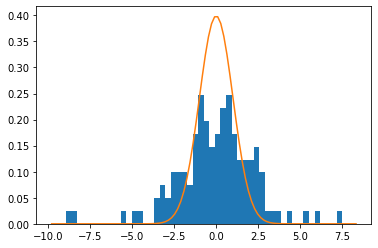

In [7]:
import scipy.stats

plt.figure()
plt.hist(pdist, density=True, bins=50)
xmin, xmax = plt.xlim()
xn = np.linspace(xmin, xmax, 100)
mean = 0  # Normal distribution
std = 1  
yn = scipy.stats.norm.pdf(xn,mean,std)
plt.plot(xn, yn)

plt.ylabel = 'Error distribution vs Normal distribution'
plt.xlabel = 'residual/std at the point'
fignm = 'ErrNormVsNormBoot' + str(numB) + '.png'

plt.savefig(fignm)

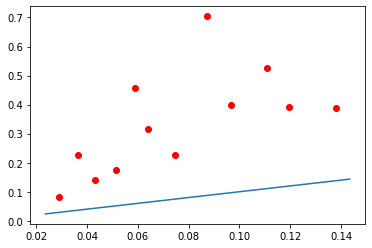

In [8]:
# Sorting pstd and perrA as parallel lists
pstdS, perrAS = zip(*sorted(zip(pstd, perrA)))
# Generated congregated points
numG = 10  # need to factor of len(X_test), size of point groups
pstdG = []
perrRMSE = []
for i in range(int(len(X_test)/numG)):
    tmpStd = []
    tmpErrA = []
    for idx in range(i*numG, i*numG+numG):
        tmpStd.append(pstdS[idx])
        tmpErrA.append(perrAS[idx])
    pstdG.append(np.mean(tmpStd))
    perrRMSE.append(np.sqrt(np.sum(np.square(tmpErrA-np.mean(tmpErrA)))))

plt.figure()
plt.plot(pstdG, perrRMSE, 'ro')
xmin, xmax = plt.xlim()
xn = np.linspace(xmin, xmax, 100)
plt.plot(xn, xn)
plt.xlabel = 'std between models'
plt.ylabel = 'Abs residual'
plt.savefig('AbsResVStd'+str(numB)+'.png')